In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,616 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

In [2]:
plt.rc('font', family='NanumBarunGothic') # 한글폰트 적용

In [3]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
chart_1904 = '/content/drive/My Drive/bc카드/주식일간기본지표_201904.csv'
chart_1905 = '/content/drive/My Drive/bc카드/주식일간기본지표_201905.csv'

In [6]:
chart_1904 = pd.read_csv(chart_1904, encoding="euc-kr")
chart_1904.head()
chart_1904.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준일자          20000 non-null  int64  
 1   주식종목값         20000 non-null  object 
 2   주식종목명         20000 non-null  object 
 3   주가순자산비율       19977 non-null  float64
 4   주가수익비율        19977 non-null  float64
 5   주가현금흐름비율      19977 non-null  float64
 6   주가매출비율        19977 non-null  float64
 7   매출액대비기업가치비율   19978 non-null  float64
 8   세전이익대비기업가치비율  19978 non-null  float64
 9   실배당수익율        12641 non-null  float64
 10  우편번호          19977 non-null  float64
 11  있음,없음         7396 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
chart_1905 = pd.read_csv(chart_1905, encoding="euc-kr")
chart_1905.head()
chart_1905.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준일자          20000 non-null  int64  
 1   주식종목값         20000 non-null  object 
 2   주식종목명         20000 non-null  object 
 3   주가순자산비율       19979 non-null  float64
 4   주가수익비율        19979 non-null  float64
 5   주가현금흐름비율      19979 non-null  float64
 6   주가매출비율        19979 non-null  float64
 7   매출액대비기업가치비율   19979 non-null  float64
 8   세전이익대비기업가치비율  19979 non-null  float64
 9   실배당수익율        12512 non-null  float64
 10  우편번호          19979 non-null  float64
 11  있음,없음         7539 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
chart_2019 = pd.concat([chart_1904,chart_1905])

In [23]:
chart_2019['기준일자'] = pd.to_datetime(chart_2019['기준일자'].astype(str), format="%Y-%m-%d")

In [9]:
chart_2019.head()

,기준일자,주식종목값,주식종목명,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율,실배당수익율,우편번호,"있음,없음"
0,20190416,A950180,SNK,NaN,NaN,NaN,NaN,-0.99,-1.82,NaN,NaN,NaN
1,20190412,A000020,동화약품,0.90,26.63,-61.50,0.87,0.54,9.96,0.0,4522.0,NaN
2,20190409,A000020,동화약품,0.88,26.05,-60.15,0.86,0.52,9.60,0.0,4522.0,NaN
3,20190402,A000020,동화약품,0.88,26.05,-60.15,0.86,0.52,9.60,0.0,4522.0,NaN
4,20190429,A000020,동화약품,0.93,27.33,-63.10,0.90,0.56,10.38,0.0,4522.0,NaN


In [46]:
len(chart_2019)

40000

In [29]:
chart_2020 = '/content/drive/My Drive/bc카드/주식일간기본지표_201904.csv'

In [30]:
chart_2020 = pd.read_csv(chart_2020, encoding="euc-kr")
chart_2020.head()

,기준일자,주식종목값,주식종목명,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율,실배당수익율,우편번호,"있음,없음"
0,20190416,A950180,SNK,NaN,NaN,NaN,NaN,-0.99,-1.82,NaN,NaN,NaN
1,20190412,A000020,동화약품,0.90,26.63,-61.50,0.87,0.54,9.96,0.0,4522.0,NaN
2,20190409,A000020,동화약품,0.88,26.05,-60.15,0.86,0.52,9.60,0.0,4522.0,NaN
3,20190402,A000020,동화약품,0.88,26.05,-60.15,0.86,0.52,9.60,0.0,4522.0,NaN
4,20190429,A000020,동화약품,0.93,27.33,-63.10,0.90,0.56,10.38,0.0,4522.0,NaN


In [31]:
chart_2020['기준일자'] = pd.to_datetime(chart_2020['기준일자'].astype(str), format="%Y-%m-%d")

In [12]:
issue = '/content/drive/My Drive/bc카드/이슈지표.csv'

In [13]:
issue_data = pd.read_csv(issue, encoding="euc-kr")
issue_data.head()

,기준일자,주식종목값,주식종목명,이슈내용,이슈분류이용문서수,우편번호,적재일시,센터코드
0,20190424,51630,진양화학,"[{'words': ['화학', '선', '차트', '진양', '상승', '주가',...",5,44781.0,2.020000e+13,BBP14
1,20190423,82920,비츠로셀,"[{'words': ['계약', '경제', '비츠', '규모', '전지', '언론사...",5,31816.0,2.020000e+13,BBP14
2,20190417,23890,한국아트라스비엑스,"[{'words': ['라스', '아트', 'BX', '주주', '밸류', '너스'...",5,34365.0,2.020000e+13,BBP14
3,20190419,97800,윈팩,"[{'words': ['경제', '서울', '윈', '팩', '헤럴드', '언론사'...",5,17172.0,2.020000e+13,BBP14
4,20190417,4960,한신공영,"[{'words': ['한신공영', '봉사', '기자', '라오스', '가구', '...",5,17172.0,2.020000e+13,BBP14


In [ ]:
# 이슈와 높은 이슈분류이용문서수 가진 회사의 일부

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


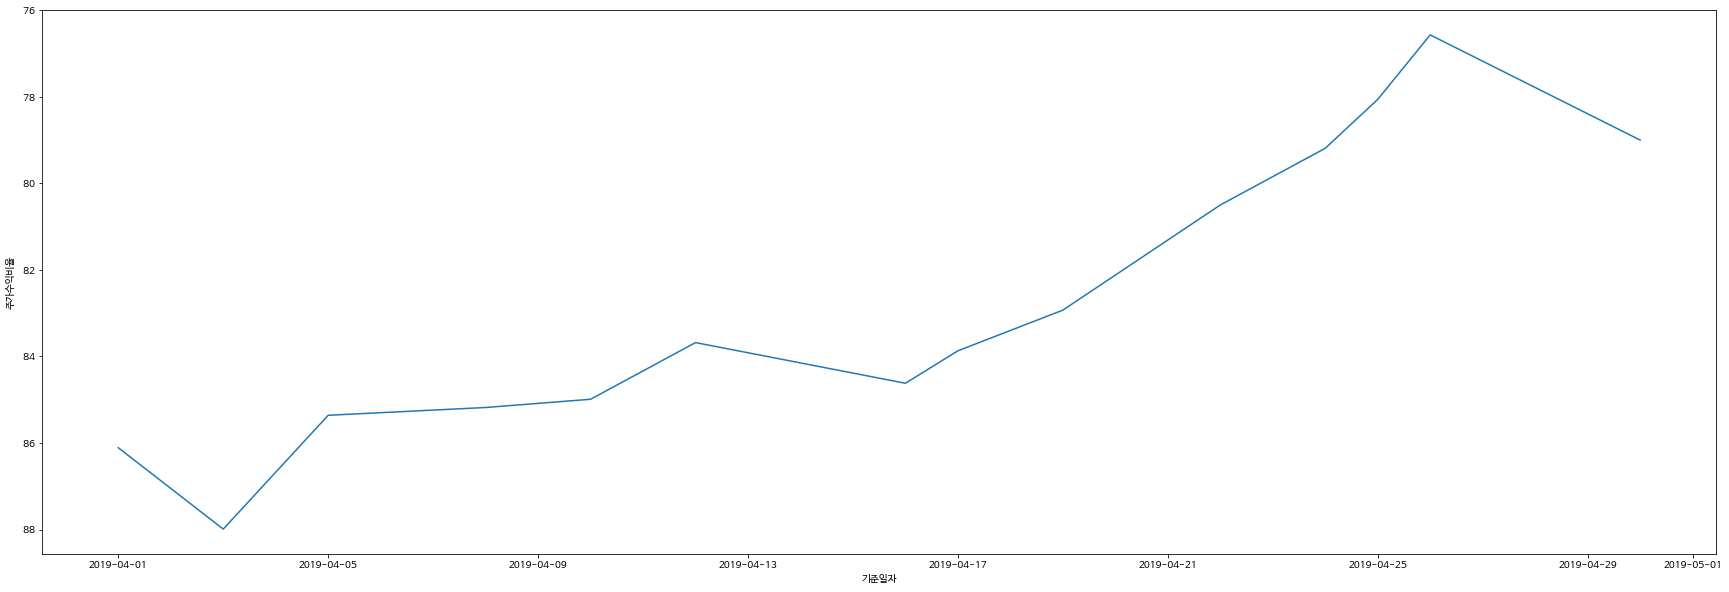

In [32]:
코미팜20 = chart_2020[chart_2020.주식종목명 == '코미팜']
plt.figure(figsize=(30,10))
sns.lineplot(x=코미팜20.기준일자, y=코미팜20.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


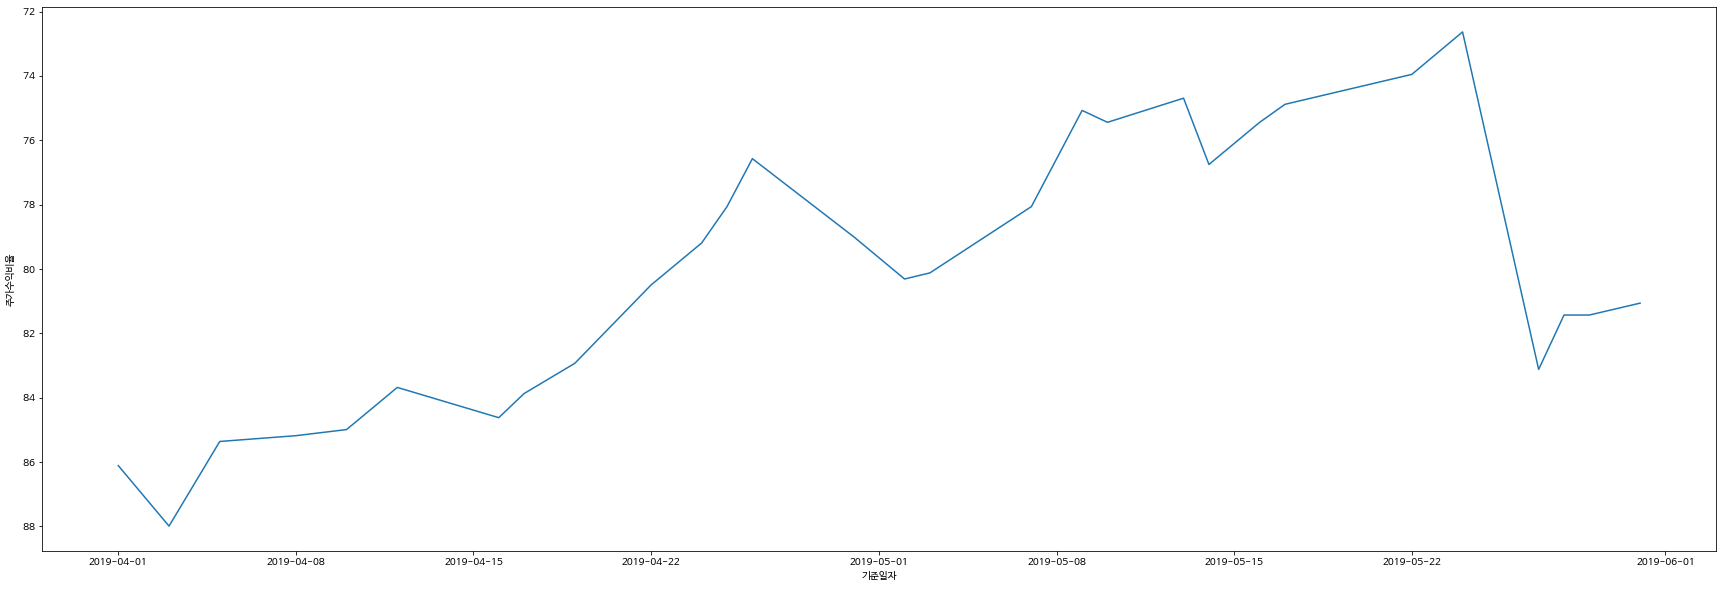

In [36]:
코미팜19 = chart_2019[chart_2019.주식종목명 == '코미팜']
plt.figure(figsize=(30,10))
sns.lineplot(x=코미팜19.기준일자, y=코미팜19.주가수익비율)

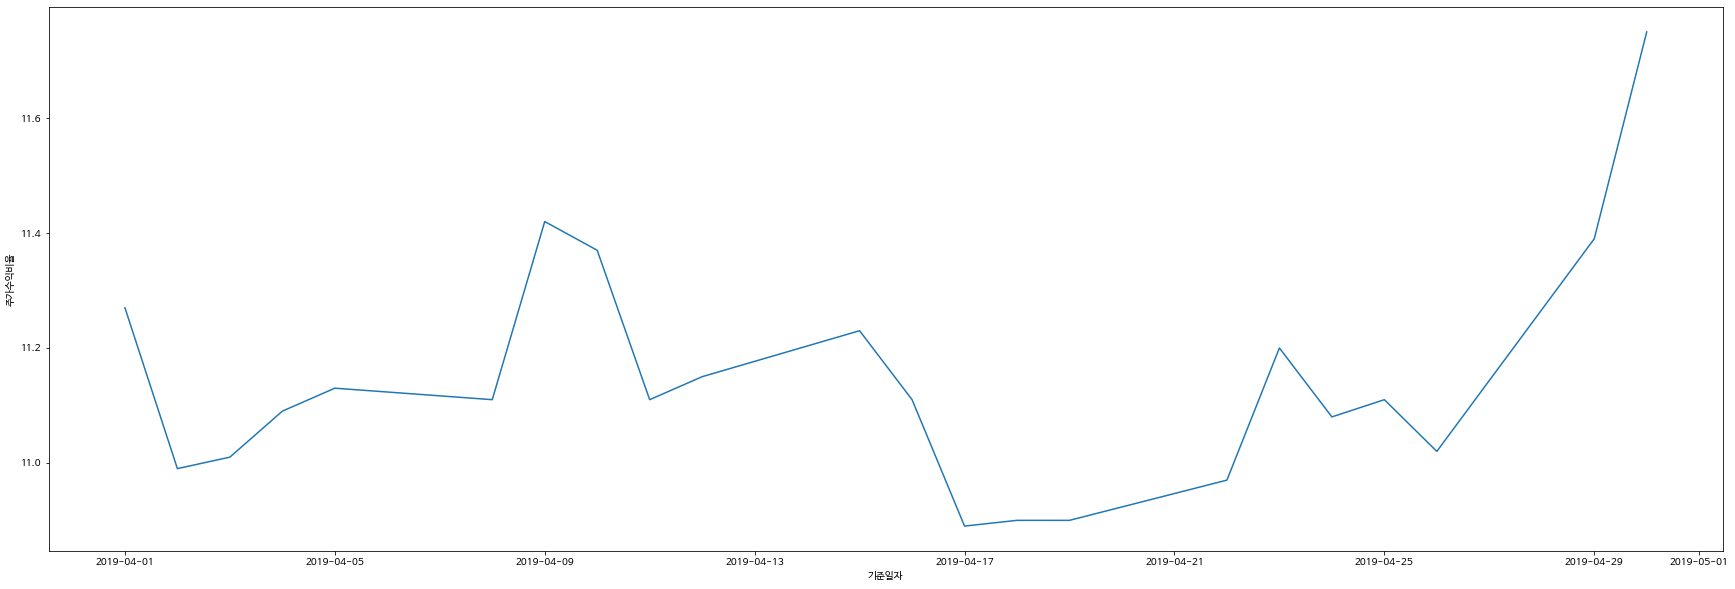

In [34]:
신세계20 = chart_2020[chart_2020.주식종목명 == '신세계']
plt.figure(figsize=(30,10))
sns.lineplot(x=신세계20.기준일자, y=신세계20.주가수익비율)

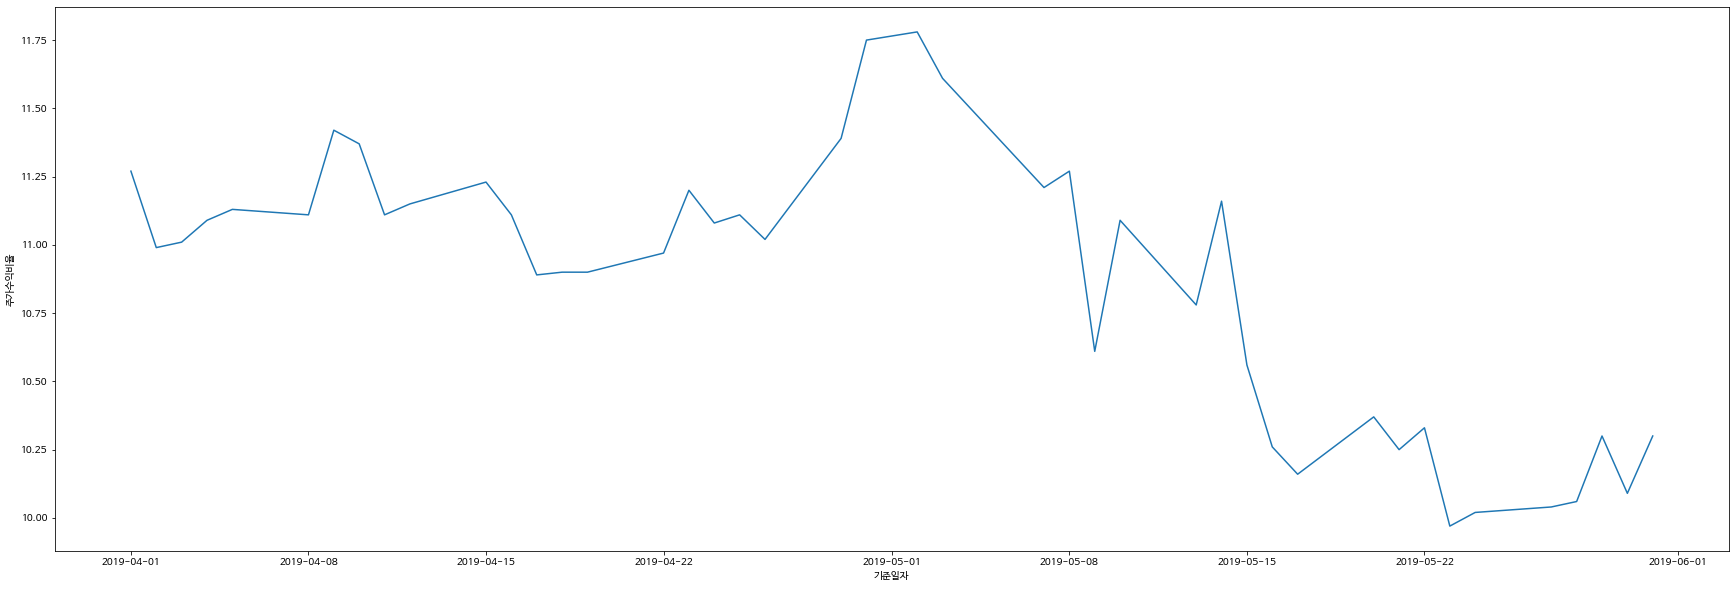

In [35]:
신세계19 = chart_2019[chart_2019.주식종목명 == '신세계']
plt.figure(figsize=(30,10))
sns.lineplot(x=신세계19.기준일자, y=신세계19.주가수익비율)

In [62]:
chart_2020[chart_2020.주식종목명 == 'NHN한국사이버결제']

,기준일자,주식종목값,주식종목명,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율,실배당수익율,우편번호,"있음,없음"
19805,2019-04-30,A060250,NHN한국사이버결제,2.83,19.58,11.71,0.76,0.54,9.21,0.0,8393.0,o
19806,2019-04-08,A060250,NHN한국사이버결제,2.51,17.32,10.36,0.67,0.45,7.70,0.0,8393.0,o
19807,2019-04-16,A060250,NHN한국사이버결제,3.02,20.88,12.49,0.81,0.59,10.07,0.0,8393.0,o
19808,2019-04-03,A060250,NHN한국사이버결제,2.54,17.52,10.48,0.68,0.46,7.84,0.0,8393.0,o
19809,2019-04-10,A060250,NHN한국사이버결제,2.59,17.87,10.69,0.69,0.47,8.07,0.0,8393.0,o
19810,2019-04-19,A060250,NHN한국사이버결제,3.00,20.74,12.41,0.80,0.58,9.98,0.0,8393.0,o
19811,2019-04-01,A060250,NHN한국사이버결제,2.51,17.32,10.36,0.67,0.45,7.70,0.0,8393.0,o
19812,2019-04-17,A060250,NHN한국사이버결제,2.97,20.53,12.28,0.80,0.57,9.84,0.0,8393.0,o
19813,2019-04-24,A060250,NHN한국사이버결제,2.91,20.12,12.04,0.78,0.56,9.57,0.0,8393.0,o
19823,2019-04-12,A060250,NHN한국사이버결제,2.79,19.30,11.55,0.75,0.53,9.02,0.0,8393.0,o


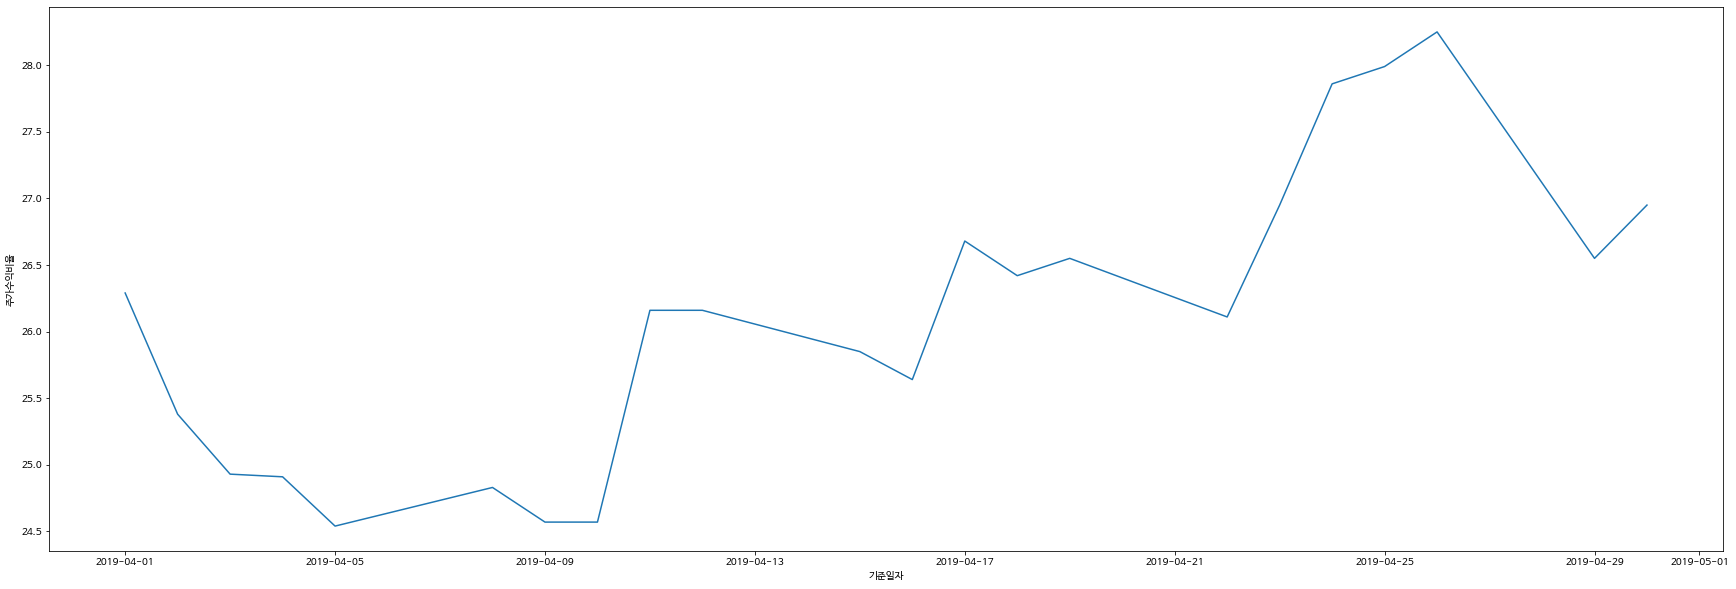

In [54]:
한샘20 = chart_2020[chart_2020.주식종목명 == '한샘']
plt.figure(figsize=(30,10))
sns.lineplot(x=한샘20.기준일자, y=한샘20.주가수익비율)

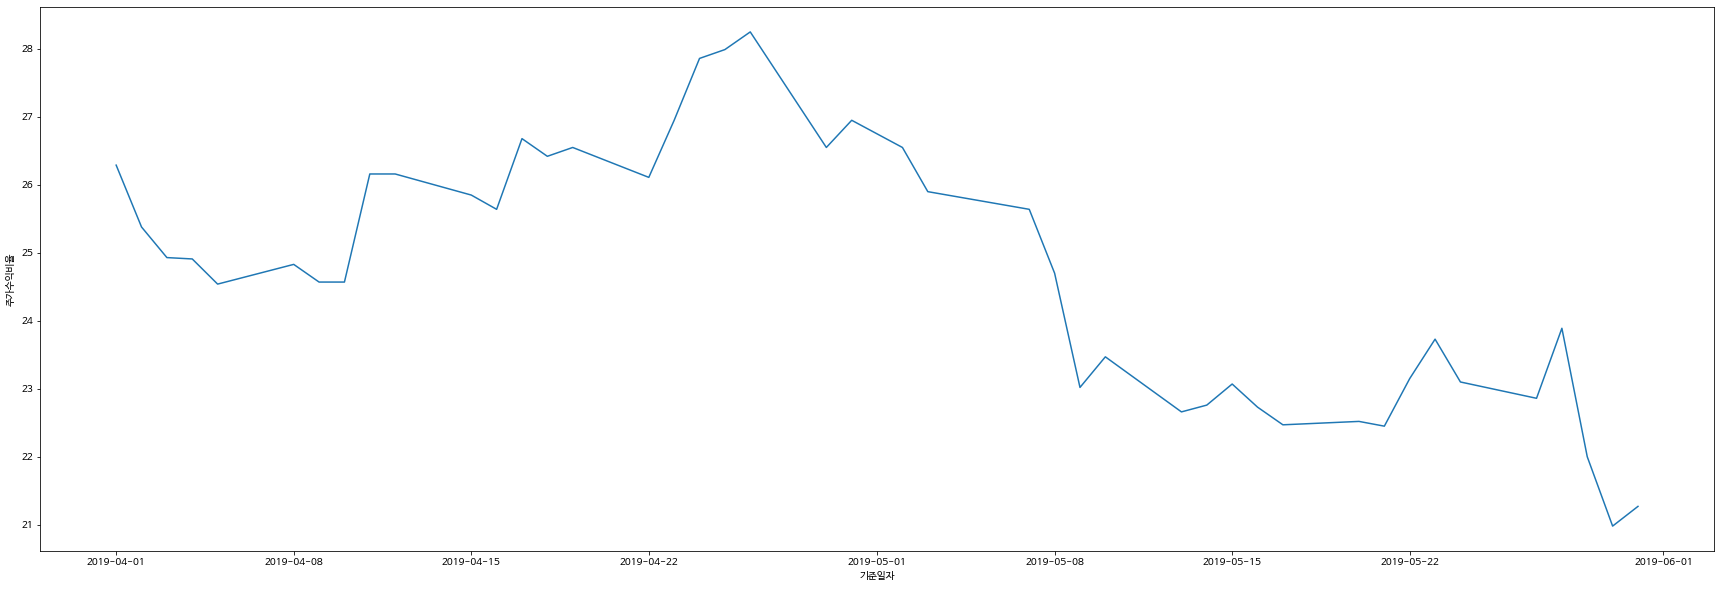

In [55]:
한샘19 = chart_2019[chart_2019.주식종목명 == '한샘']
plt.figure(figsize=(30,10))
sns.lineplot(x=한샘19.기준일자, y=한샘19.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


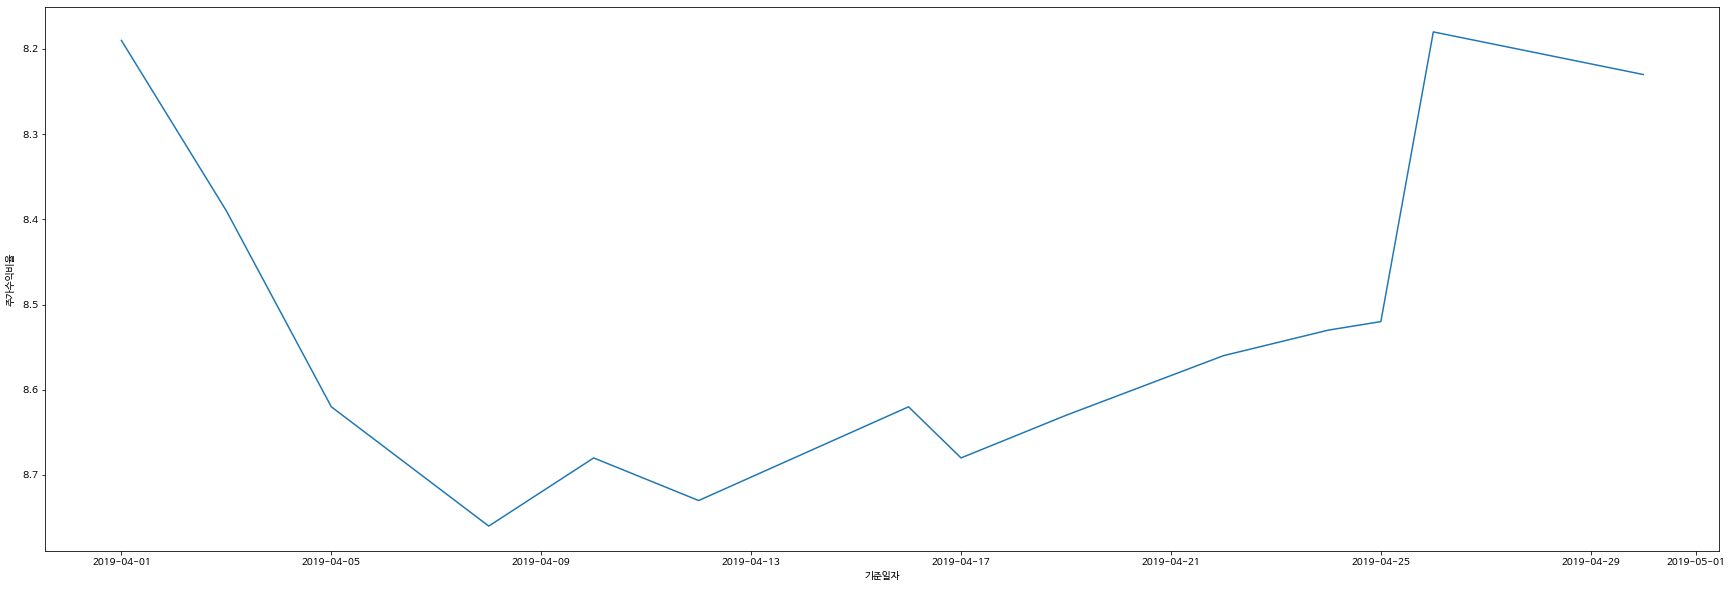

In [59]:
한빛소프트20 = chart_2020[chart_2020.주식종목명 == '한빛소프트']
plt.figure(figsize=(30,10))
sns.lineplot(x=한빛소프트20.기준일자, y=한빛소프트20.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


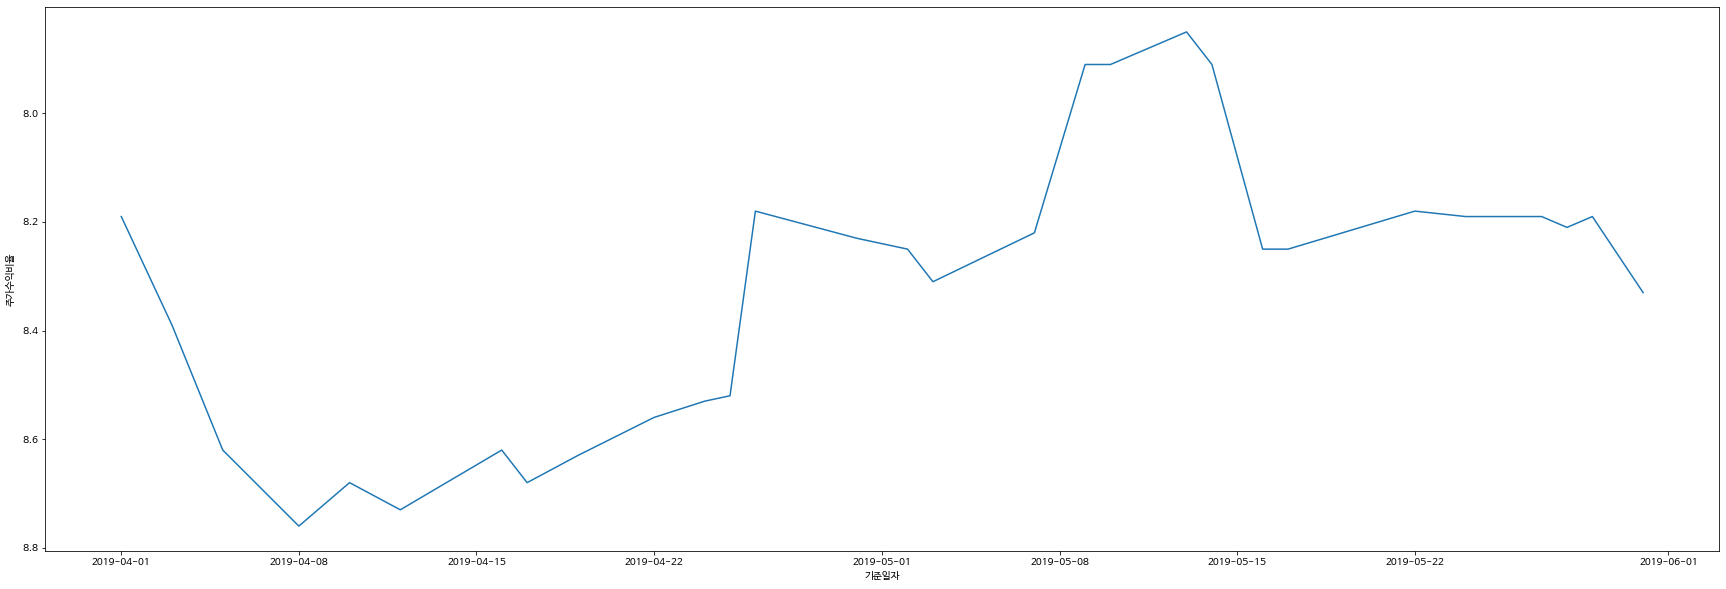

In [60]:
한빛소프트19 = chart_2019[chart_2019.주식종목명 == '한빛소프트']
plt.figure(figsize=(30,10))
sns.lineplot(x=한빛소프트19.기준일자, y=한빛소프트19.주가수익비율)

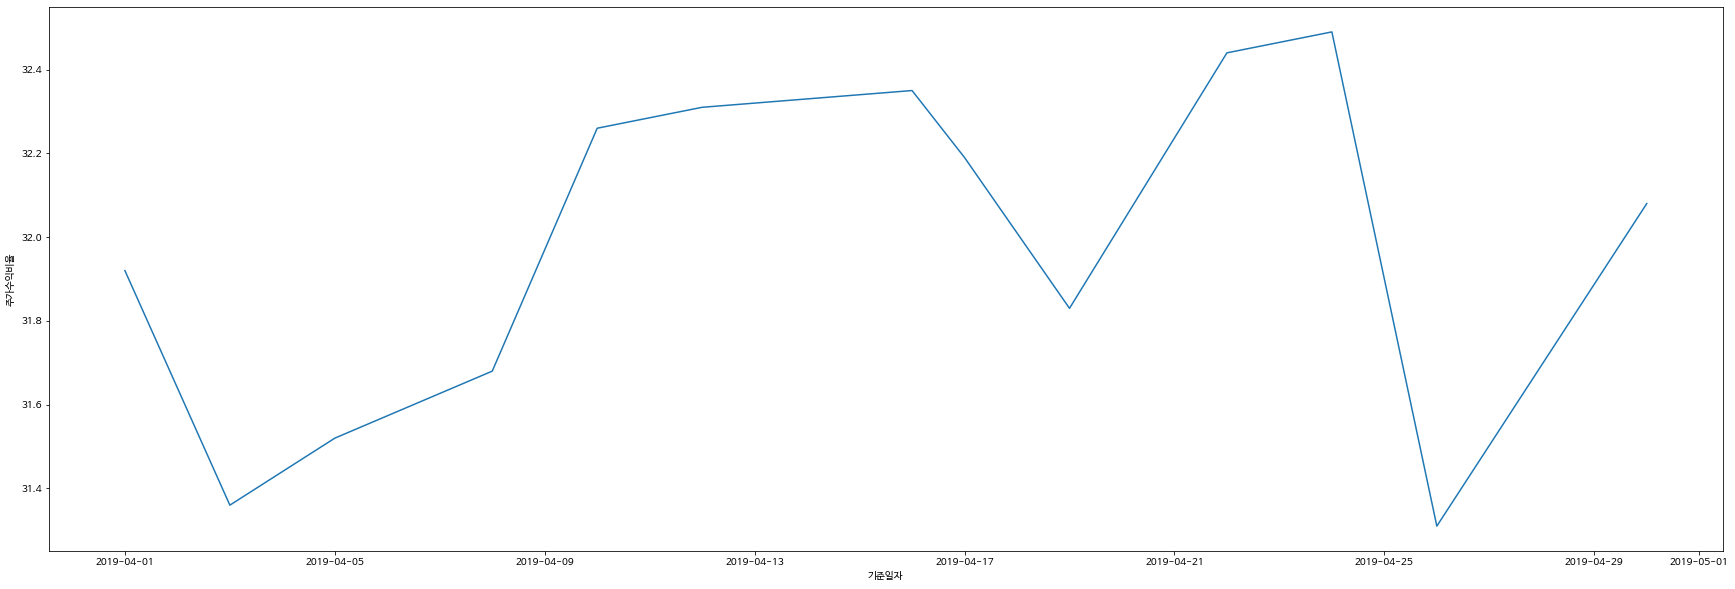

In [64]:
LG생활건강20 = chart_2020[chart_2020.주식종목명 == 'LG생활건강']
plt.figure(figsize=(30,10))
sns.lineplot(x=LG생활건강20.기준일자, y=LG생활건강20.주가수익비율)

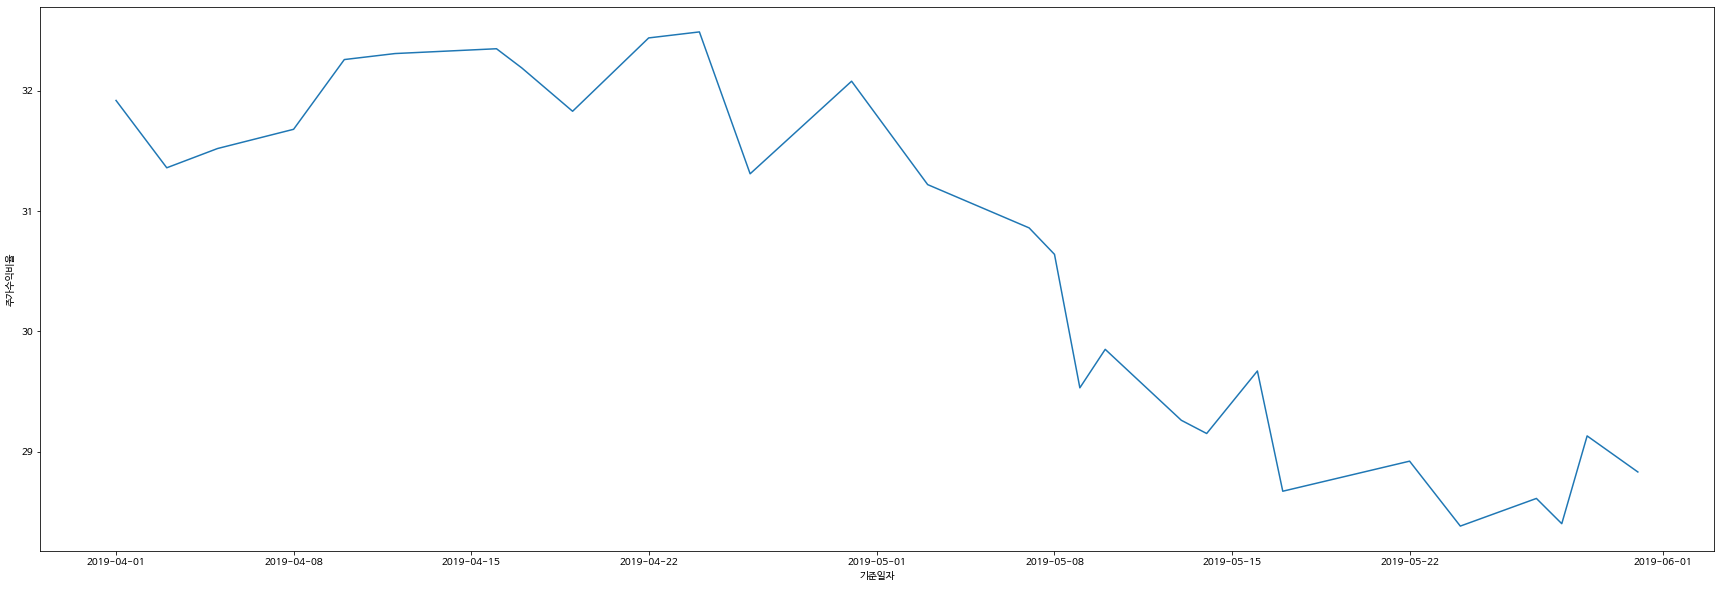

In [65]:
LG생활건강19 = chart_2019[chart_2019.주식종목명 == 'LG생활건강']
plt.figure(figsize=(30,10))
sns.lineplot(x=LG생활건강19.기준일자, y=LG생활건강19.주가수익비율)

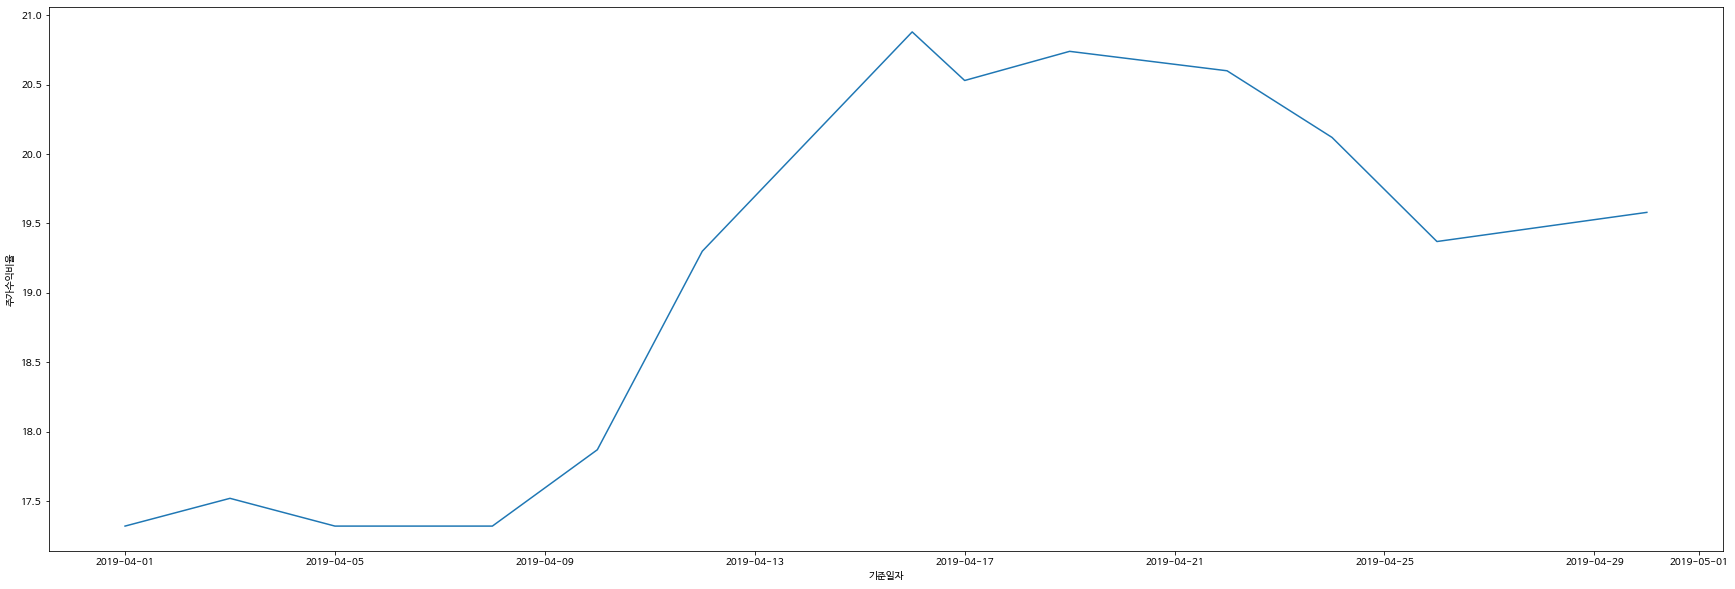

In [63]:
NHN한국사이버결제20 = chart_2020[chart_2020.주식종목명 == 'NHN한국사이버결제']
plt.figure(figsize=(30,10))
sns.lineplot(x=NHN한국사이버결제20.기준일자, y=NHN한국사이버결제20.주가수익비율)

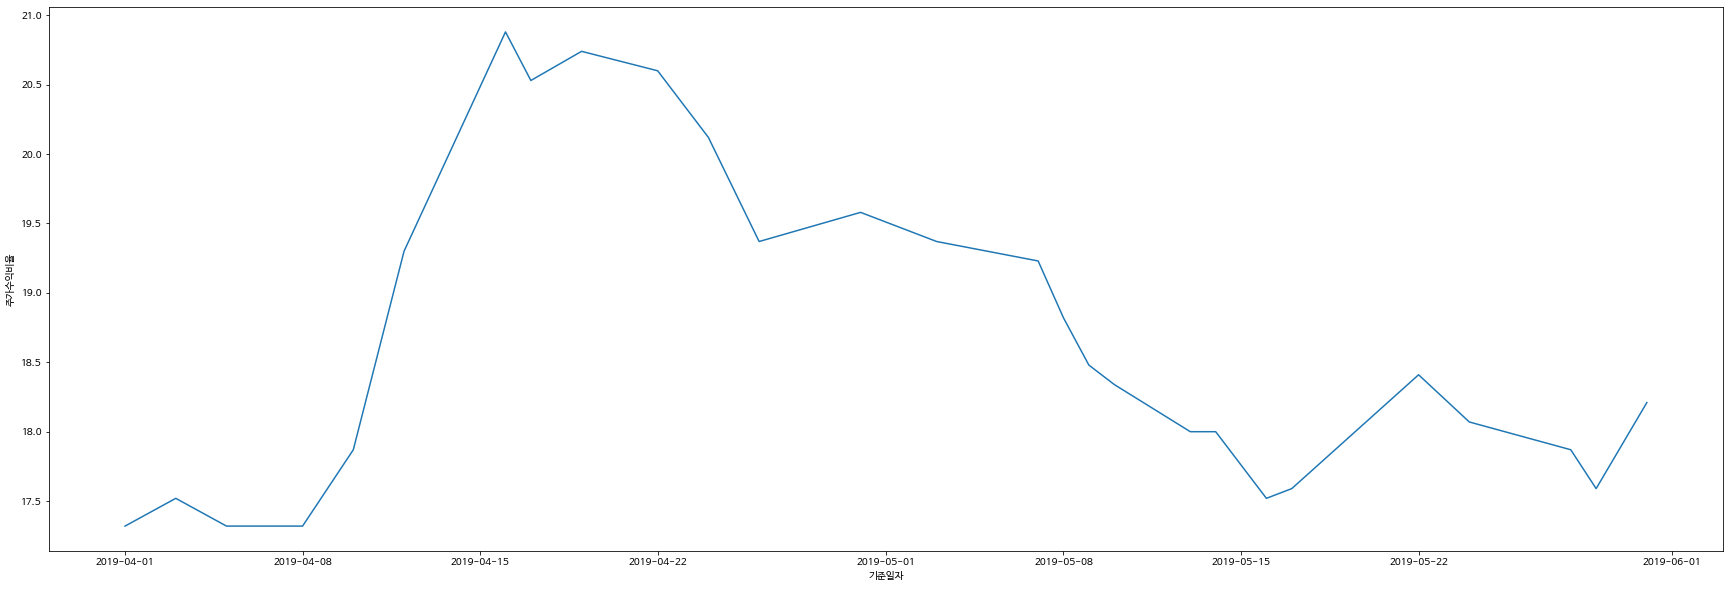

In [66]:
NHN한국사이버결제19 = chart_2019[chart_2019.주식종목명 == 'NHN한국사이버결제']
plt.figure(figsize=(30,10))
sns.lineplot(x=NHN한국사이버결제19.기준일자, y=NHN한국사이버결제19.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


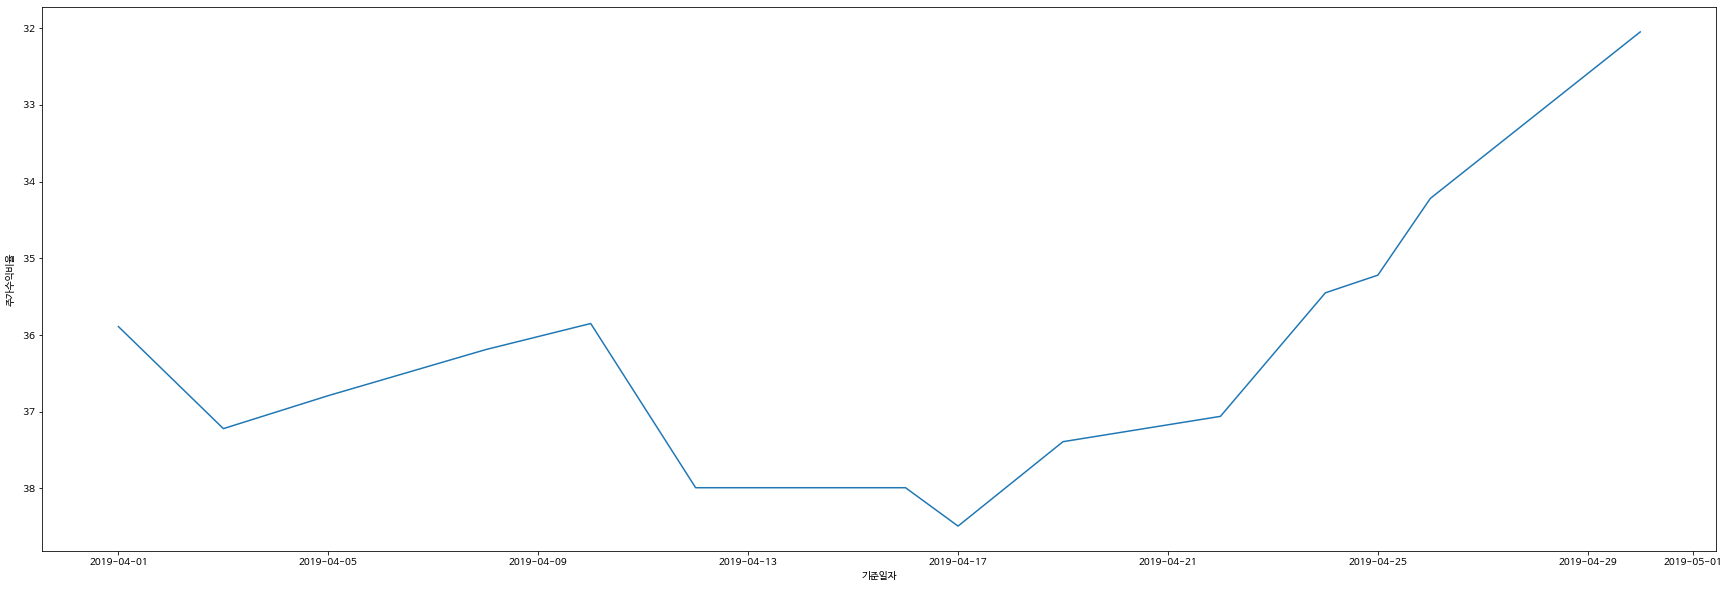

In [68]:
카페2420 = chart_2020[chart_2020.주식종목명 == '카페24']
plt.figure(figsize=(30,10))
sns.lineplot(x=카페2420.기준일자, y=카페2420.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


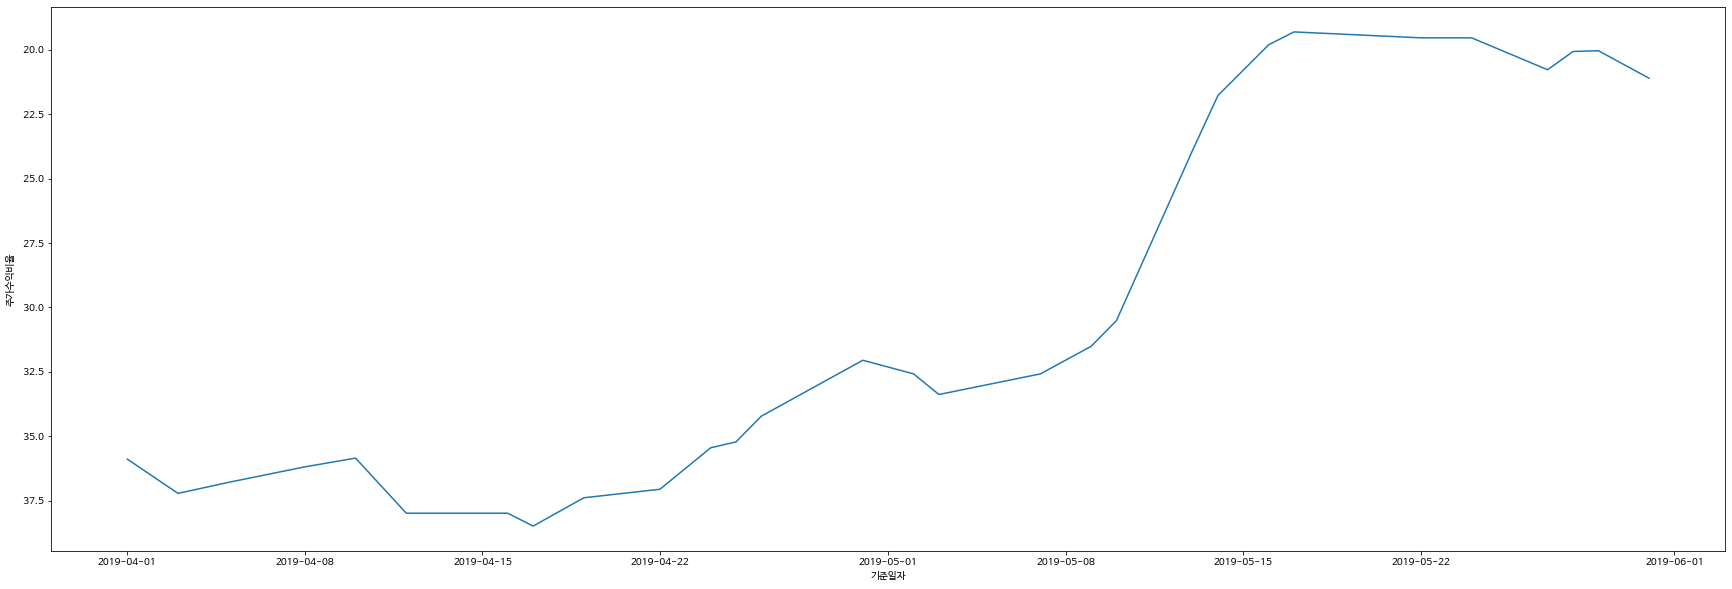

In [67]:
카페2419 = chart_2019[chart_2019.주식종목명 == '카페24']
plt.figure(figsize=(30,10))
sns.lineplot(x=카페2419.기준일자, y=카페2419.주가수익비율)

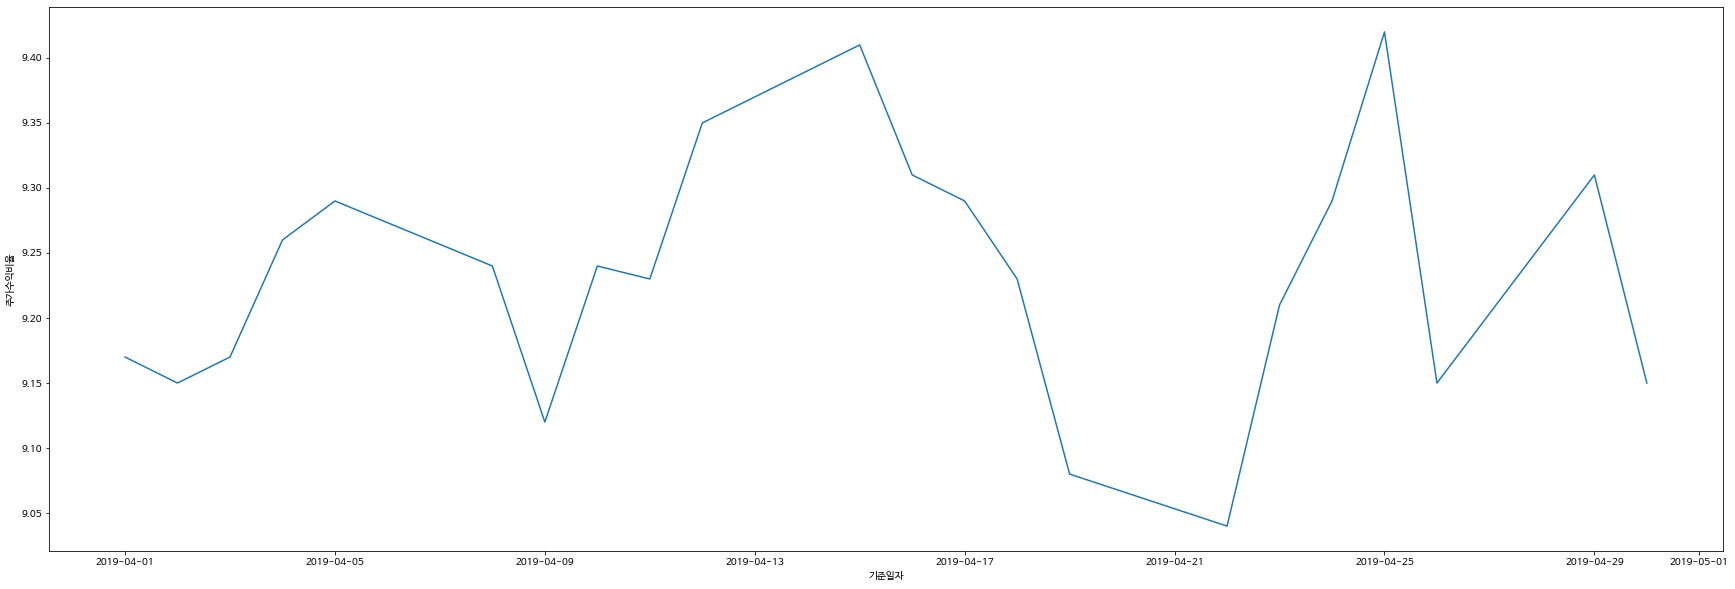

In [69]:
현대해상20 = chart_2020[chart_2020.주식종목명 == '현대해상']
plt.figure(figsize=(30,10))
sns.lineplot(x=현대해상20.기준일자, y=현대해상20.주가수익비율)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


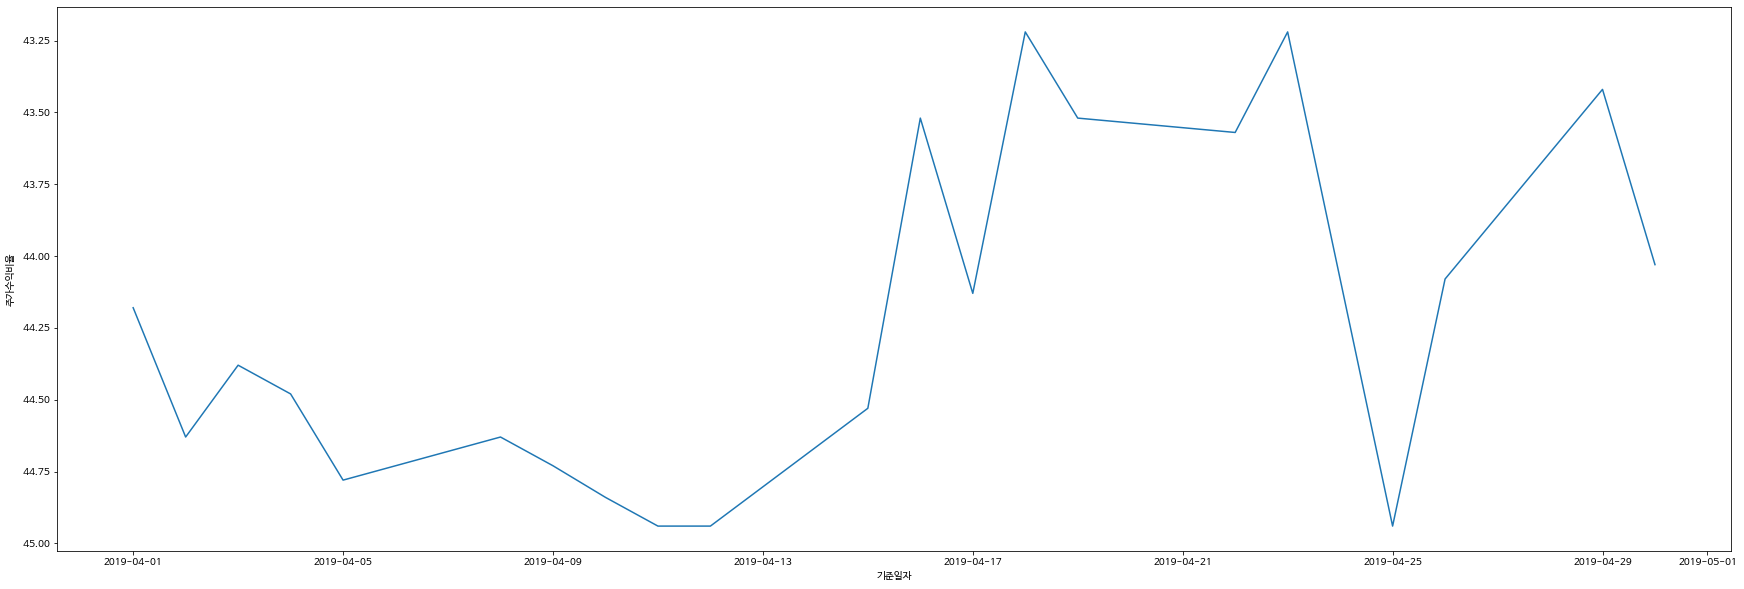

In [72]:
DB20 = chart_2020[chart_2020.주식종목명 == 'DB']
plt.figure(figsize=(30,10))
sns.lineplot(x=DB20.기준일자, y=DB20.주가수익비율)

In [ ]:
# 온라인 상거래나, 온라인 수업을 하는 그런 교육, 온라인 거래를 위한 결제 시스템. 비대면 관련 주식이 미래에 굿굿 아니면 IT,
# 제약과 바이오 쪽도 좋지만 코로나 사태가 나아진다면 떨어질수 있어서 유망직종이라고 하기는 다소 어려움이 있다.
# 키워드 언급이 자주 되는 그런 회사를 쓰는것도 좋을듯 교육이나 그런 회사는 잘 나오지 않음..ㅎㅎ ㅠㅠ 없음 데이터가!
# 사회적으로 좋은일 하고 기부하는 경우는 크게 관련이 있어 보이지 않는다